In [1]:
import sys
sys.path.append("../../")

from src.sslHiC import get_reproducibility_score
from src.data.utils import cool_to_mats

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
## Please first download H1 cooler files from https://figshare.com/s/3d451933300ad64c34ff and unzip the files into the dataset/H1 directory.

samples = ['ES','ME','MS','NP','TB']

In [3]:
resol = '50kb'
bio_replicate_scores = []
non_replicate_scores = []
for chrom in ['chr21']:
    for sample1 in samples:
        s1_r1 = cool_to_mats(f"dataset/H1/{sample1}_replicate1_hg19_{resol}.cool", [chrom])[0]
        s1_r2 = cool_to_mats(f"dataset/H1/{sample1}_replicate2_hg19_{resol}.cool", [chrom])[0]
        rep_score = get_reproducibility_score(s1_r1,s1_r2,resol,complete=False)
        bio_replicate_scores.append(rep_score)
        for sample2 in samples:
            if sample2  != sample1:
                s2_r1 = cool_to_mats(f"dataset/H1/{sample2}_replicate1_hg19_{resol}.cool", [chrom])[0]
                s2_r2 = cool_to_mats(f"dataset/H1/{sample2}_replicate2_hg19_{resol}.cool", [chrom])[0]
                rep_score = get_reproducibility_score(s1_r1,s2_r1,resol,complete=False)
                non_replicate_scores.append(rep_score)
                rep_score = get_reproducibility_score(s1_r2,s2_r2,resol,complete=False)
                non_replicate_scores.append(rep_score)
                rep_score = get_reproducibility_score(s1_r2,s2_r1,resol,complete=False)
                non_replicate_scores.append(rep_score)
                rep_score = get_reproducibility_score(s1_r1,s2_r2,resol,complete=False)
                non_replicate_scores.append(rep_score)

<AxesSubplot:xlabel='x', ylabel='y'>

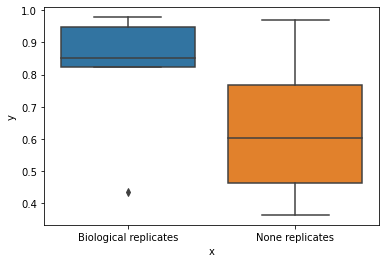

In [4]:
x=['Biological replicates']*len(bio_replicate_scores)+['None replicates']*len(non_replicate_scores)
y = bio_replicate_scores + non_replicate_scores
data = pd.DataFrame({'x':x,'y':y})
sns.boxplot(x='x',y='y',data=data)